# Comparaison des différentes méthodes pour la super résolution d'images

## I Importation des bibliothèques nécessaires

In [31]:
import numpy as np
import matplotlib.pyplot as mp
import cv2
import zipfile
import os
from metrics import Metric
from src.linear_interpolation import LinearInterpolation
from src.bilinear_interpolation import BilinearInterpolation
from src.bicubic_interpolation import BicubicInterpolation

## II Téléchargement d'un dataset

In [32]:
!wget --no-check-certificate --no-clobber \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

# Extracting zip file to the base directory `/tmp/cats_and_dogs_filtered`
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'validation')

# Directories with training/validation cat/dogs pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
valid_cats_dir = os.path.join(valid_dir, 'cats')
valid_dogs_dir = os.path.join(valid_dir, 'dogs')

# Display the sizes of our dataset
print(f'Number of train cat images: {len(os.listdir(train_cats_dir))}')
print(f'Number of train dog images: {len(os.listdir(train_dogs_dir))}')
print(f'Number of valid cat images: {len(os.listdir(valid_cats_dir))}')
print(f'Number of valid dog images: {len(os.listdir(valid_dogs_dir))}')

# Display some images files for cats and dogs
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

File ‘/tmp/cats_and_dogs_filtered.zip’ already there; not retrieving.
Number of train cat images: 1000
Number of train dog images: 1000
Number of valid cat images: 500
Number of valid dog images: 500
['cat.36.jpg', 'cat.133.jpg', 'cat.928.jpg', 'cat.231.jpg', 'cat.485.jpg', 'cat.135.jpg', 'cat.545.jpg', 'cat.981.jpg', 'cat.913.jpg', 'cat.446.jpg']


## III Affichage de quelques exemples

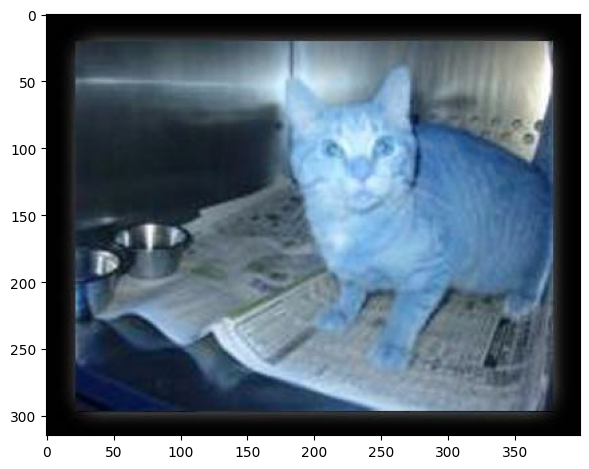

In [33]:
c = np.random.randint(len(os.listdir(train_cats_dir)))
cat = cv2.imread(train_cats_dir + '/' + train_cat_fnames[c])
mp.imshow(cat)
mp.tight_layout()

## IV Test des différentes métriques